In [1]:
# 引入所需要的全部包
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import time

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
## 创建一个时间字符串格式化字符串
def date_format(dt):
    import time
    t = time.strptime(' '.join(dt), '%d/%m/%Y %H:%M:%S')
    return (t.tm_year, t.tm_mon, t.tm_mday, t.tm_hour, t.tm_min, t.tm_sec)

In [3]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [4]:
# 加载数据
#path = 'datas\household_power_consumption.txt' ## 全部数据
#path = 'datas\household_power_consumption_200.txt' ## 200行数据
path = 'G:/BigDataNote/testData/household_power_consumption/household_power_consumption.txt' ## 1000行数据
df = pd.read_csv(path, sep=';', low_memory=False)

# 日期、时间、有功功率、无功功率、电压、电流、厨房用电功率、洗衣服用电功率、热水器用电功率
names=['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# 异常数据处理(异常数据过滤)
new_df = df.replace('?', np.nan)
datas = new_df.dropna(how = 'any') # 只要有列为空，就进行删除操作

准确率: 0.485065781751


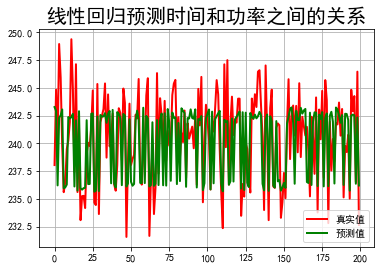

In [5]:
## 时间和电压之间的关系(Linear)
# 获取x和y变量, 并将时间转换为数值型连续变量
X = datas[names[0:2]]
X = X.apply(lambda x: pd.Series(date_format(x)), axis=1)
Y = datas[names[4]]

# 对数据集进行测试集合训练集划分
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 数据标准化
ss = StandardScaler()
X_train = ss.fit_transform(X_train) # 训练并转换
X_test = ss.transform(X_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 

# 模型训练
lr = LinearRegression()
lr.fit(X_train, Y_train) ## 训练模型

# 模型校验
y_predict = lr.predict(X_test) ## 预测结果

# 模型效果
print "准确率:",lr.score(X_test, Y_test)

## 预测值和实际值画图比较
t=np.arange(len(X_test))
plt.figure(facecolor='w')
plt.plot(t, Y_test, 'r-', linewidth=2, label=u'真实值')
plt.plot(t, y_predict, 'g-', linewidth=2, label=u'预测值')
plt.legend(loc = 'lower right')
plt.title(u'线性回归预测时间和功率之间的关系', fontsize=20)
plt.grid(b=True)
plt.show()

1阶，系数为： [  0.00000000e+00   6.66133815e-16   4.44089210e-16   3.97781449e+00
   8.73334650e-01   1.70647992e-01   0.00000000e+00]
2阶，系数为： [  6.15522676e+09  -1.70095409e+09   1.98635439e+09   2.19027668e+12
   2.95447102e+00   2.70094955e-01  -1.99713069e+09  -2.10345826e+08
   2.49926882e+09   3.90625000e-03   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.43578369e+12  -2.49752197e+01
  -5.14648438e-01   0.00000000e+00  -1.02257385e+01  -4.62158203e-01
   0.00000000e+00  -3.57666016e-02   0.00000000e+00   0.00000000e+00]
3阶，系数为： [ -4.59388159e+11  -5.26288240e+12  -2.91299982e+13  -3.48525114e+11
  -5.21503123e+11   3.56450371e+11   1.55559235e+12   5.14268785e+12
   4.05922040e+12   5.60494581e+11   1.48956595e+11  -4.61435780e+12
  -6.73417370e+12   2.96991615e+12  -2.38932075e+12  -7.68828351e+12
   3.50031659e+12   0.00000000e+00  -7.44734696e+12   2.10132742e+11
  -1.43626933e+11  -9.765

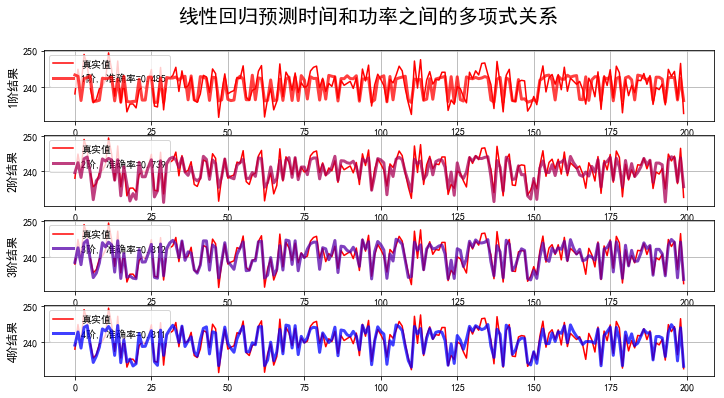

In [24]:
## 时间和电压之间的关系(Linear-多项式)
models = [
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', LinearRegression())
        ])
]
model = models[0]
# 获取x和y变量, 并将时间转换为数值型连续变量
X = datas[names[0:2]]
X = X.apply(lambda x: pd.Series(date_format(x)), axis=1)
Y = datas[names[4]]

# 对数据集进行测试集合训练集划分
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 数据标准化
ss = StandardScaler()
X_train = ss.fit_transform(X_train) # 训练并转换
X_test = ss.transform(X_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 

# 模型训练
t=np.arange(len(X_test))
N = 5
d_pool = np.arange(1,N,1) # 阶
m = d_pool.size
clrs = [] # 颜色
# linspace(开始，结束)生成默认50个数值的等差数列，第三个参数可以指定数列元素个数
for c in np.linspace(16711680, 255, m):
    #     转化成16进制
    clrs.append('#%06x' % c)
line_width = 3
# figsize设置图片比例
plt.figure(figsize=(12,6), facecolor='w')
# enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
# i为这个元素在列表中的下标，d为列表的某个值
for i,d in enumerate(d_pool):
    plt.subplot(N-1,1,i+1)
    plt.plot(t, Y_test, 'r-', label=u'真实值', ms=10, zorder=N)
    model.set_params(Poly__degree=d) ## 设置多项式的阶乘
    model.fit(X_train, Y_train)
    lin = model.get_params('Linear')['Linear']
    output = u'%d阶，系数为：' % d
    print output, lin.coef_.ravel()
    
    y_hat = model.predict(X_test)
    s = model.score(X_test, Y_test)
    
    z = N - 1 if (d == 2) else 0
    label = u'%d阶, 准确率=%.3f' % (d,s)
#     zorder，用来控制绘图的顺序，也就是你所谓的叠加样式。zorder越大，相当于画上去的越晚，该线条也就在上面了。
    plt.plot(t, y_hat, color=clrs[i], lw=line_width, alpha=0.75, label=label, zorder=z)
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.ylabel(u'%d阶结果' % d, fontsize=12)

## 预测值和实际值画图比较
# plt.legend(loc = 'lower right')
plt.suptitle(u"线性回归预测时间和功率之间的多项式关系", fontsize=20)
plt.grid(b=True)
plt.show()